STAT619
HW1
Juan Guzman

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("readxl")
install.packages("lubridate")
install.packages("tseries")

In [ ]:
%%R
# a)
# Read the data into your software.
library(readxl)
library(lubridate)
library(tseries)

MSFT_data <- read_excel("/content/drive/MyDrive/STAT619 - Time series analysis /HW1_Microsoft.xlsx")

In [ ]:
%%R
# b)
# Obtain basic univariate statistics including summary statistics
# (mean, median, standard deviation, etc)

avg = mean(MSFT_data$Close)
mdn = median(MSFT_data$Close)
stddev = sd(MSFT_data$Close)
maxim = max(MSFT_data$Close)
minim = min(MSFT_data$Close)
range = maxim - minim

print(paste("Average: ", avg))
print(paste("Median: ", mdn))
print(paste("Standard Deviation: ", stddev))
print(paste("Maximum: ", maxim))
print(paste("Minimum: ", minim))

[1] "Average:  313.951"
[1] "Median:  324.65"
[1] "Standard Deviation:  40.9758577490831"
[1] "Maximum:  382.7"
[1] "Minimum:  222.31"


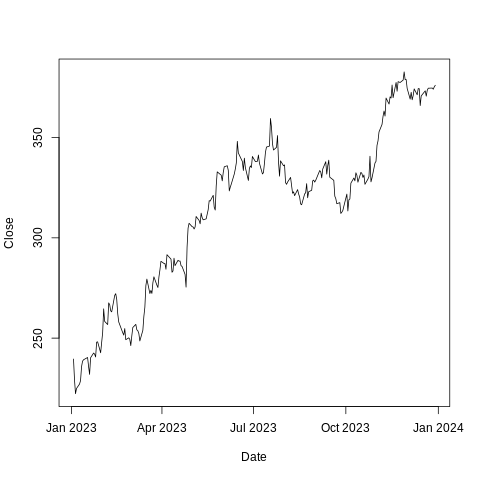

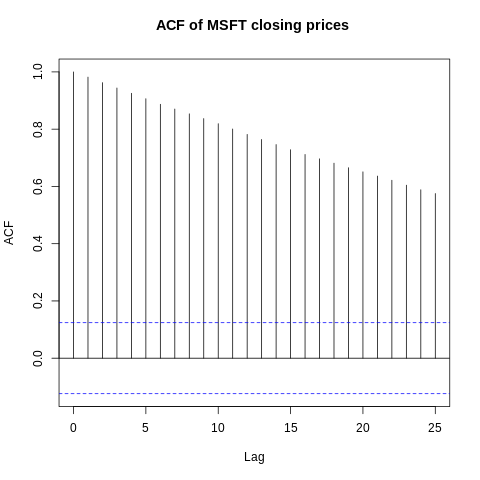

In [ ]:
%%R
# c)
# Plot the data and calculate the sample autocorrelation function
# For plotting, I need to change the format from mm/dd/yyyy to yyyy-mm-dd
# Specify the column containing dates

# Parse the dates in mm/dd/yyyy format
MSFT_data$date_formated <- mdy(MSFT_data[["Date"]])

# Plotting the data:
plot.default(MSFT_data$date_formated,MSFT_data$Close, type='l', xlab='Date', ylab='Close')
autocorrelation = acf(MSFT_data$Close, lag.max = 25, type = "correlation", main = 'ACF of MSFT closing prices ')


In [ ]:
%%R
adf.test(MSFT_data$Close)
# d)
# The data is non-stationary because it varies with time, there is an obvious trend that increases with time
# However, applying thd Augmented Dickey-Fuller test, we can see that p is 0.5556
# which is significantly higher that alpha = 0.05. Thus we have to accept the null
# which is that the data closing price series is non-stationary


	Augmented Dickey-Fuller Test

data:  MSFT_data$Close
Dickey-Fuller = -2.0479, Lag order = 6, p-value = 0.5556
alternative hypothesis: stationary



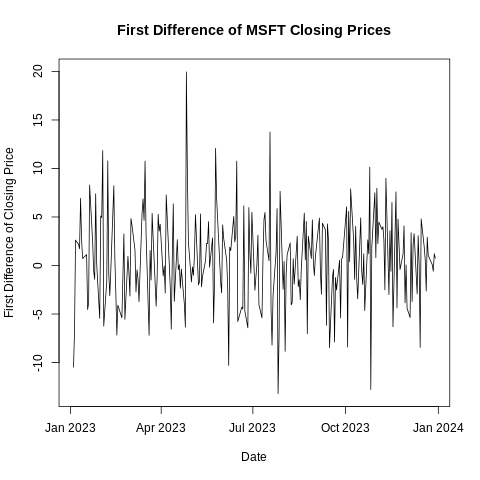

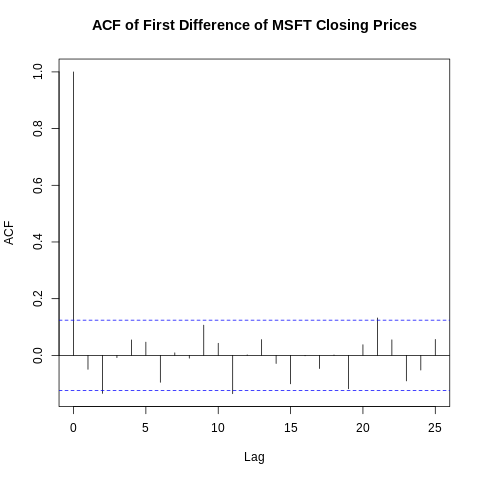

In [ ]:
%%R
# e)
# Take the first difference of the series. Is the differenced time series stationary? Explain.

# The differenced data does not seem to the increasing with time.
# This means that the data is stationary.
# Applying th3 Augmented Dickey-Fuller test, we can see that p is 0.01
# which is lower than alpha = 0.05. Thus, We can reject the null
# which is that the first difference of closing price series is non-stationary. Making the first difference stationary

diff_series <- diff(MSFT_data$Close)
plot(MSFT_data$date_formated[-1], diff_series,type = "l", xlab = "Date", ylab = "First Difference of Closing Price", main = "First Difference of MSFT Closing Prices")
acf(diff_series,lag.max = 25, type = "correlation", main = "ACF of First Difference of MSFT Closing Prices")


In [ ]:
%%R
adf.test(diff_series)


	Augmented Dickey-Fuller Test

data:  diff_series
Dickey-Fuller = -5.993, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



In [ ]:
%%R
avg_diff = mean(diff_series)
mdn_diff = median(diff_series)
stddev_diff = sd(diff_series)
maxim_diff = max(diff_series)
minim_diff = min(diff_series)
range_diff = maxim_diff - minim_diff

print(paste("Average: ", avg_diff))
print(paste("Median: ", mdn_diff))
print(paste("Standard Deviation: ", stddev_diff))
print(paste("Maximum: ", maxim_diff))

[1] "Average:  0.548032128514056"
[1] "Median:  0.579999999999984"
[1] "Standard Deviation:  4.76960493044361"
[1] "Maximum:  19.95"
